<a id="cont"></a>

## Table of Contents
<a href=#one2>1. Meet the Collaborators</a>

<a href=#one1>2. Introduction</a>

<a href=#onei>3. Problem Statement</a>


<a href=#one>4. Importing Packages</a>

<a href=#two>5. Loading Data</a>

<a href=#three>6. Exploratory Data Analysis (EDA)</a>


<a href=#four>7. Data Engineering</a>

<a href=#five>8. Modeling</a>

<a href=#six>9. Model Performance</a>

<a href=#seven>10. Model Explanations</a>

<a href=#threefiv>11. Conclusion</a>

<a href=#threefi>12. References</a>

<a href=#threefi>13. Kaggle Submission</a>

<a href=#threefi>14. Saving Models</a>

## 1. Meet the Colaborators

   #### - AbdulMu'izz Okunade
   #### - Ruth Favour Ossai
   #### - Francis Egah
   #### - Lesego Tiro
   #### - Michael Benjamin
   #### - Haruna Jibrin 


### Honour Code 


Honour Code
I {TEAM NM1}, confirm - by submitting this document - that the solutions in this notebook are a result of my own work and that I abide by the EDSA honour code.

Non-compliance with the honour code constitutes a material breach of contract

<a id="one1"></a>
## 2. Introduction

<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

<a id="onei"></a>
## 3.  Problem Statement: Twitter Sentiment Classification

<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

 <a id="one"></a>
## 4. Importing Packages
<a href=#cont>Back to Table of Contents</a>

In [35]:
# utilities
import re
import numpy as np
import pandas as pd
import string
import urllib
import matplotlib.pyplot as plt
# plotting
import seaborn as sns
from wordcloud import WordCloud
import matplotlib.pyplot as plt
# nltk
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, TreebankWordTokenizer

# sklearn
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix, classification_report
# Libraries from Sklearn
from sklearn.model_selection import GridSearchCV
from sklearn import svm
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix, classification_report


<a id="two"></a>
## 5. Loading the Data
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

In [2]:
# Load the train and test data

df_train = pd.read_csv('train.csv')
df_test= pd.read_csv('test_with_no_labels.csv')

In [3]:
df_train.head()

,sentiment,message,tweetid
0,1,PolySciMajor EPA chief doesn't think carbon di...,625221
1,1,It's not like we lack evidence of anthropogeni...,126103
2,2,RT @RawStory: Researchers say we have three ye...,698562
3,1,#TodayinMaker# WIRED : 2016 was a pivotal year...,573736
4,1,"RT @SoyNovioDeTodas: It's 2016, and a racist, ...",466954


The train dataset includes all features of the Dataframe.

<a id="three"></a>
## 6. Exploratory Data Analysis (EDA)
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

### 6.1  The INITIAL INSPECTION AND OBSERVATION OF THE TRAIN DATASET



In [4]:
# train Dataset
df_train.head(100)

,sentiment,message,tweetid
0,1,PolySciMajor EPA chief doesn't think carbon di...,625221
1,1,It's not like we lack evidence of anthropogeni...,126103
2,2,RT @RawStory: Researchers say we have three ye...,698562
3,1,#TodayinMaker# WIRED : 2016 was a pivotal year...,573736
4,1,"RT @SoyNovioDeTodas: It's 2016, and a racist, ...",466954
...,...,...,...
95,1,"RT @RonaldKlain: As Trump decides on Paris, @B...",458845
96,1,RT @savingoceans: Lack of #climate change acti...,695439
97,1,“Yet another Trump advisor is clueless on clim...,894382
98,1,RT @StephenSchlegel: she's thinking about how ...,603318


The first five rows and the last five rows of the dataset. This is the dataframe used to train the model.

In [5]:
df_test.head()

,message,tweetid
0,Europe will now be looking to China to make su...,169760
1,Combine this with the polling of staffers re c...,35326
2,"The scary, unimpeachable evidence that climate...",224985
3,@Karoli @morgfair @OsborneInk @dailykos \nPuti...,476263
4,RT @FakeWillMoore: 'Female orgasms cause globa...,872928


This is the dataframe used to test the model.
The Test Data set does not have the sentiment column which is the Target variable. The target varible is predicted in the modelling phase and the results are then compared to the sentiment column in the Train Dataset. This is how the accuracy of the model is measured.

In [6]:
# Columns of the dataset
df_train.columns

Index(['sentiment', 'message', 'tweetid'], dtype='object')

These are the columns that make up the dataset 

In [7]:
# Shape of data Set
df_train.shape


(15819, 3)


This shows that the shape of the dataframe entails of 15819 rows and 3 rows.


In [8]:
# total number of entries in dataset
df_train.size

47457

The dataframe consists of 47457 entries.


In [9]:
#unique values in columns
df_train.nunique()

sentiment        4
message      14229
tweetid      15819
dtype: int64

This is the the number of unique values present in each of the three columns that makeup the dataset



### 6.1 Column Datatypes


In [10]:
#Data information
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15819 entries, 0 to 15818
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   sentiment  15819 non-null  int64 
 1   message    15819 non-null  object
 2   tweetid    15819 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 370.9+ KB


In [11]:
# Nullvalues present in each column
df_train.isnull().sum()

sentiment    0
message      0
tweetid      0
dtype: int64

As represented above there are no missing values in any of the three feature of the dataset, which means there will not be any neccesary entity replacement in data engineering.


In [12]:
df_train.describe(include='object')

,message
count,15819
unique,14229
top,RT @StephenSchlegel: she's thinking about how ...
freq,307


In [13]:
# The most occuring value in sentiment
df_train['sentiment'].mode()

0    1
Name: sentiment, dtype: int64

The most occuring value in the sentiment column is '1', this is referred to as the mode.

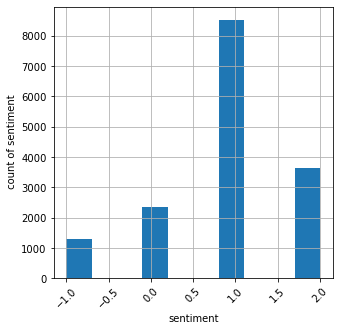

In [14]:
df_train['sentiment'].hist(figsize=(5,5), xrot=45)
plt.xlabel('sentiment')
plt.ylabel(' count of sentiment')
plt.show()

The visual clearly indicates that sentiment 1(Neutral) occurs way more in the sentiment column than 0(pro),-1(News) and 2(Anti). This is the mode.

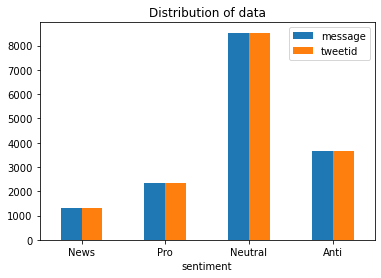

In [15]:
# Plotting the distribution for dataset.
ax = df_train.groupby('sentiment').count().plot(kind='bar', title='Distribution of data',legend=True)
ax.set_xticklabels(['News','Pro', 'Neutral', 'Anti'], rotation=0)
#ax.set_yticklabels(['Count'], rotation=90)
# Storing data in lists.
text, sentiment = list(df_train['message']), list(df_train['sentiment'])

This illustrates the sentiment entities in the dataset in a more understandable sense, the sentiment values are given meaning with -1 as News, 0 as Pro, 1 as Neutral and 2 as Anti. and the visual clearly shows on how each TweetiD is tied to a tweet Message. 

<a id="four"></a>
## 7. Data Engineering
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>


**Cleaning and removing URL’s**

In [16]:
pattern_url = r'http[s]?://(?:[A-Za-z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9A-Fa-f][0-9A-Fa-f]))+'
subs_url = r'url-web'
df_train['message'] = df_train['message'].replace(to_replace = pattern_url, value = subs_url, regex = True)

Punctuation Removal: 
In this step, all the punctuations from the text are removed. string library of Python contains some pre-defined list of punctuations such as ‘!”#$%&'()*+,-./:;?@[\]^_`{|}~’

In [17]:
#defining the function to remove punctuation
def remove_punctuation(text):
    punctuationfree="".join([i for i in text if i not in string.punctuation])
    return punctuationfree
#storing the puntuation free text
df_train['message']= df_train['message'].apply(lambda x:remove_punctuation(x))
df_train.head()

,sentiment,message,tweetid
0,1,PolySciMajor EPA chief doesnt think carbon dio...,625221
1,1,Its not like we lack evidence of anthropogenic...,126103
2,2,RT RawStory Researchers say we have three year...,698562
3,1,TodayinMaker WIRED 2016 was a pivotal year in...,573736
4,1,RT SoyNovioDeTodas Its 2016 and a racist sexis...,466954


We can see in the above output, all the punctuations are removed from message and stored in the clean_msg column. 

**Lowering the text:**

It is one of the most common preprocessing steps where the text is converted into the same case preferably lower case. We are doing this because we don't want `Message` and `message` or any form of its spellings to be read as  different words.

In [18]:
df_train['message']= df_train['message'].apply(lambda x: x.lower())


We have succesfully converted all the characters to lower case

**Tokenization:** 

In this step, the text is split into smaller units. We can use either sentence tokenization or word tokenization based on our problem statement.

In [19]:
df_train.head()

,sentiment,message,tweetid
0,1,polyscimajor epa chief doesnt think carbon dio...,625221
1,1,its not like we lack evidence of anthropogenic...,126103
2,2,rt rawstory researchers say we have three year...,698562
3,1,todayinmaker wired 2016 was a pivotal year in...,573736
4,1,rt soynoviodetodas its 2016 and a racist sexis...,466954


In [20]:
stopwords_list = stopwords.words('english')
stopwords_list = set(stopwords_list)
def cleaning_stopwords(text):
    return " ".join([word for word in str(text).split() if word not in stopwords_list])
df_train['message'] = df_train['message'].apply(lambda text: cleaning_stopwords(text))
df_train.head()

,sentiment,message,tweetid
0,1,polyscimajor epa chief doesnt think carbon dio...,625221
1,1,like lack evidence anthropogenic global warming,126103
2,2,rt rawstory researchers say three years act cl...,698562
3,1,todayinmaker wired 2016 pivotal year war clima...,573736
4,1,rt soynoviodetodas 2016 racist sexist climate ...,466954


**Cleaning and removing repeating characters**

In [21]:
def cleaning_repeating_char(text):
    return re.sub(r'(.)1+', r'1', text)
df_train['message'] = df_train['message'].apply(lambda x: cleaning_repeating_char(x))
df_train.tail()

,sentiment,message,tweetid
15814,1,rt ezlusztig took material global warming lgbt...,22001
15815,2,rt washingtonpost climate change could breakin...,17856
15816,0,notiven rt nytimesworld trump actually believe...,384248
15817,-1,rt sara8smiles hey liberals climate change cra...,819732
15818,0,rt chetcannon kurteichenwalds climate change e...,806319


**Cleaning and removing URL’s**

In [22]:
def cleaning_numbers(data):
    return re.sub('[0-9]+', '', data)
df_train['message'] = df_train['message'].apply(lambda x: cleaning_numbers(x))
df_train.tail()

,sentiment,message,tweetid
15814,1,rt ezlusztig took material global warming lgbt...,22001
15815,2,rt washingtonpost climate change could breakin...,17856
15816,0,notiven rt nytimesworld trump actually believe...,384248
15817,-1,rt sarasmiles hey liberals climate change crap...,819732
15818,0,rt chetcannon kurteichenwalds climate change e...,806319


In [23]:
tokeniser = TreebankWordTokenizer()
df_train['message'] = df_train['message'].apply(tokeniser.tokenize)
df_train.head()

,sentiment,message,tweetid
0,1,"[polyscimajor, epa, chief, doesnt, think, carb...",625221
1,1,"[like, lack, evidence, anthropogenic, global, ...",126103
2,2,"[rt, rawstory, researchers, say, three, years,...",698562
3,1,"[todayinmaker, wired, pivotal, year, war, clim...",573736
4,1,"[rt, soynoviodetodas, racist, sexist, climate,...",466954


In [24]:
import nltk
st = nltk.PorterStemmer()
def stemming_on_text(data):
    text = [st.stem(word) for word in data]
    return data
df_train['message']= df_train['message'].apply(lambda x: stemming_on_text(x))
df_train.head()

,sentiment,message,tweetid
0,1,"[polyscimajor, epa, chief, doesnt, think, carb...",625221
1,1,"[like, lack, evidence, anthropogenic, global, ...",126103
2,2,"[rt, rawstory, researchers, say, three, years,...",698562
3,1,"[todayinmaker, wired, pivotal, year, war, clim...",573736
4,1,"[rt, soynoviodetodas, racist, sexist, climate,...",466954


In [25]:
df_train['message'].iloc[5555]

['algae', 'could', 'make', 'global', 'warming', 'worse', 'urlweb', 'urlweb']

In [26]:
lemma = nltk.WordNetLemmatizer()
def lemmatizer_on_text(data):
    text = [lemma.lemmatize(word) for word in data]
    return data
df_train['message'] = df_train['message'].apply(lambda x: lemmatizer_on_text(x))
df_train['message'].head()

0    [polyscimajor, epa, chief, doesnt, think, carb...
1    [like, lack, evidence, anthropogenic, global, ...
2    [rt, rawstory, researchers, say, three, years,...
3    [todayinmaker, wired, pivotal, year, war, clim...
4    [rt, soynoviodetodas, racist, sexist, climate,...
Name: message, dtype: object

In [27]:
df_train['message'].iloc[5555]

['algae', 'could', 'make', 'global', 'warming', 'worse', 'urlweb', 'urlweb']

**Separating input feature and label**

In [28]:
X=df_train.message
y=df_train.sentiment

In [29]:
# Separating the 95% data for training data and 5% for testing data
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.05, random_state =26105111)

In [32]:
print("Now convert these pre processed text to numeric format to send it to the model.")
print("Using TF-IDF approach to covert text to numbers.\n")

vectorizer = TfidfVectorizer() #instantiating the vectorizer
train_vectors = vectorizer.fit_transform(X_train.apply(lambda x: ' '.join(x)))

val_vectors = vectorizer.transform(X_test.apply(lambda x: ' '.join(x)))
print("Shape of training data : ",train_vectors.shape, "\nShape of Testing data : ",val_vectors.shape)

Now convert these pre processed text to numeric format to send it to the model.
Using TF-IDF approach to covert text to numbers.

Shape of training data :  (15028, 23475) 
Shape of validation data :  (791, 23475)


In [33]:
names = ['Logistic Regression', 'Nearest Neighbors',
         'Linear SVM', 'RBF SVM',
         'Decision Tree', 'Random Forest',  'AdaBoost', "Naive Bayes"]

In [39]:
'''def model_Evaluate(model):
# Predict values for Test dataset
    y_pred = model.predict(X_test)
# Print the evaluation metrics for the dataset.
    print(classification_report(y_test, y_pred))
# Compute and plot the Confusion matrix
    cf_matrix = confusion_matrix(y_test, y_pred)
    categories = ['Negative','Positive']
    group_names = ['True Neg','False Pos', 'False Neg','True Pos']
    group_percentages = ['{0:.2%}'.format(value) for value in cf_matrix.flatten() / np.sum(cf_matrix)]
    labels = [f'{v1}n{v2}' for v1, v2 in zip(group_names,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    sns.heatmap(cf_matrix, annot = labels, cmap = 'Blues',fmt = '',
    xticklabels = categories, yticklabels = categories)
    plt.xlabel("Predicted values", fontdict = {'size':14}, labelpad = 10)
    plt.ylabel("Actual values" , fontdict = {'size':14}, labelpad = 10)
    plt.title ("Confusion Matrix", fontdict = {'size':18}, pad = 20)'''

In [40]:
'''BNBmodel = BernoulliNB()
BNBmodel.fit(X_train, y_train)
model_Evaluate(BNBmodel)
y_pred1 = BNBmodel.predict(X_test)'''

ValueError: setting an array element with a sequence.

In [37]:
classifiers = [
    LogisticRegression(),
    SVC(kernel="linear", C=0.025),
    SVC(gamma=2, C=1),
    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
    AdaBoostClassifier(),
    MultinomialNB(0.05)
]


# Dividing Data to Training and Validation Sets
from sklearn.model_selection import train_test_split  
x = pp_list
y = train_data['lang_id'].values
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state = 1)
print("Number of data points in training data :\n")
print("X = ", len(X_train))
print("Y = ", len(y_train))

print("\nNumber of data points in test data :\n")
print("X = ", len(X_test))
print("Y = ", len(y_test))

NameError: name 'SVC' is not defined

In [ ]:
# Separating the 80% data for training data and 20% for testing data
#X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state =42)

**Transforming Dataset using TF-IDF Vectorizer**

In [ ]:
'''vectoriser = TfidfVectorizer(ngram_range=(1,2), max_features=5000000)
vectoriser.fit(X_train.apply(lambda x: ' '.join(x)))
print('No. of feature_words: ', len(vectoriser.get_feature_names()))'''

In [ ]:
'''X_train = vectoriser.transform(X_train.apply(lambda x: ' '.join(x)))
X_test  = vectoriser.transform(X_test.apply(lambda x: ' '.join(x)))'''

<a id="five"></a>
## 8. Modelling
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

<a id="six"></a>
## 9. Model Performance
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

<a id="seven"></a>
## 10. Model Explanations
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

<a id="threefiv"></a>

## 11. Conclusion
<a class="anchor" id="1.1"></a>
<a href=#cont> Back to Table of Contents </a>

<a id="threefi"></a>

## 12. References
<a class="anchor" id="1.1"></a>
<a href=#cont> Back to Table of Contents </a>

1.https://heartbeat.comet.ml/exploratory-data-analysis-eda-for-categorical-data-870b37a79b65

2.https://www.kdnuggets.com/2021/03/11-essential-code-blocks-exploratory-data-analysis.html

 <a id="threef"></a>

## 13.  Kaggle Submission
<a class="anchor" id="1.1"></a>
<a href=#cont> Back to Table of Contents </a>

<a id="threeif"></a>

## 14 Saving the Models
<a class="anchor" id="1.1"></a>
<a href=#cont> Back to Table of Contents </a>